<a href="https://colab.research.google.com/github/akshat-646/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE PRICE PREDICTION**

## **1.Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## **2.Create Dataset**

In [2]:
n_sample=1000
data={
  'bedrooms':np.random.randint(1,6,n_sample),
  'bathrooms':np.random.randint(1,4,n_sample),
  'sqft_living':np.random.randint(500,4000,n_sample),
  'sqft_lot':np.random.randint(1000,10000,n_sample),
  'floors':np.random.randint(1,4,n_sample),
  'age':np.random.randint(1,100,n_sample),
  'condition':np.random.randint(1,6,n_sample)
}

In [3]:
price = (
    data['bedrooms'] * 15000 +
    data['bathrooms'] * 10000 +
    data['sqft_living'] * 100 +
    data['sqft_lot'] * 2 +
    data['floors'] * 5000 +
    (6 - data['condition']) * -8000 +  # better condition = higher price
    data['age'] * -500 +  # older = cheaper
    np.random.normal(0, 20000, n_sample)  # random noise
)

In [4]:
data['price']=price
df = pd.DataFrame(data)

In [5]:
print(df.head())

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  age  condition  \
0         3          1         1484      5854       3   96          4   
1         3          3         3196      3216       3   91          4   
2         4          3         3486      9594       2   25          4   
3         1          1         2116      9721       3   70          1   
4         1          3         2869      5795       2   45          5   

           price  
0  166317.466191  
1  370247.326777  
2  462859.551062  
3  236675.946485  
4  342144.133365  


## **3.Exploratory Data Analysis**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     1000 non-null   int64  
 1   bathrooms    1000 non-null   int64  
 2   sqft_living  1000 non-null   int64  
 3   sqft_lot     1000 non-null   int64  
 4   floors       1000 non-null   int64  
 5   age          1000 non-null   int64  
 6   condition    1000 non-null   int64  
 7   price        1000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [7]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,price
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.989000,2.021000,2225.694000,5546.83600,1.972000,49.713000,3.032000,260921.161249
std,1.405295,0.815613,1002.359814,2635.21091,0.820908,27.813598,1.434934,104782.920063
min,1.000000,1.000000,501.000000,1011.00000,1.000000,1.000000,1.000000,26042.042392
25%,2.000000,1.000000,1305.750000,3216.75000,1.000000,25.750000,2.000000,174903.217121
50%,3.000000,2.000000,2234.000000,5446.00000,2.000000,50.500000,3.000000,263110.065147
75%,4.000000,3.000000,3044.750000,7907.25000,3.000000,73.000000,4.000000,348498.629671
max,5.000000,3.000000,3999.000000,9997.00000,3.000000,99.000000,5.000000,494427.509070


## **4.Data Visualization**

**4.1 Price Distribution**

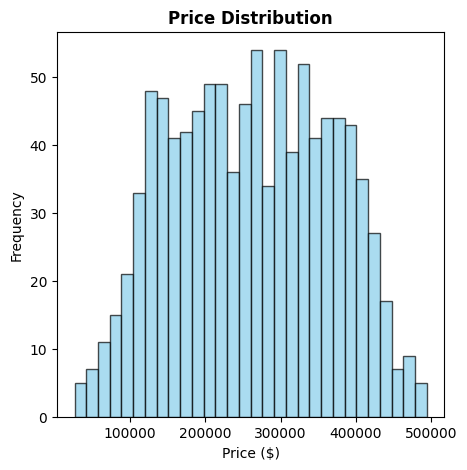

In [8]:
plt.figure(figsize=(5, 5))
plt.hist(df['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Price Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

**4.2 Correlation Heatmap**

Text(0.5, 1.0, 'Feature Correlation Matrix')

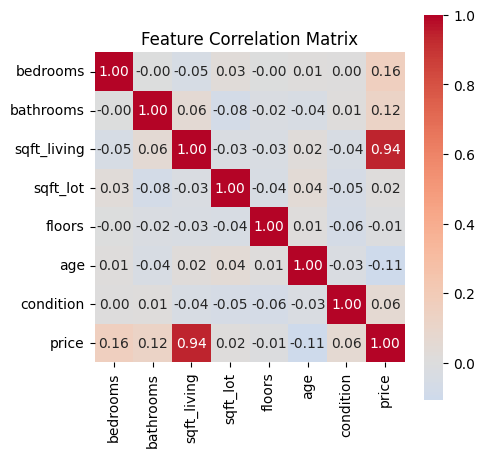

In [9]:
plt.figure(figsize=(5, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')


**4.3 Price vs Square**

Text(0, 0.5, 'Price')

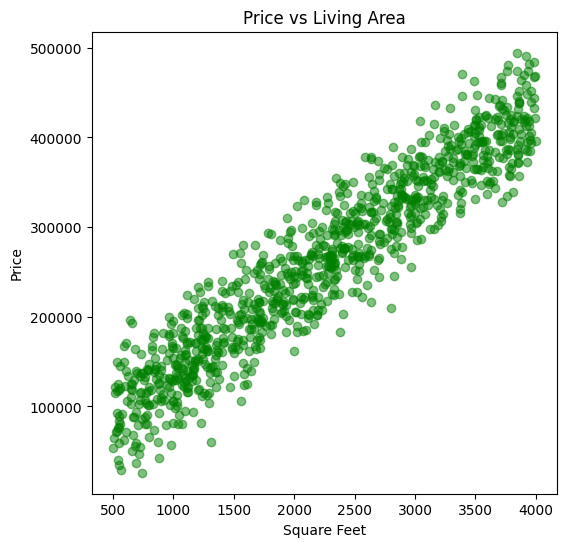

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5, color='green')
plt.title('Price vs Living Area')
plt.xlabel('Square Feet')
plt.ylabel('Price')

**4.4 Price vs Bedrooms**

Text(0, 0.5, 'Price')

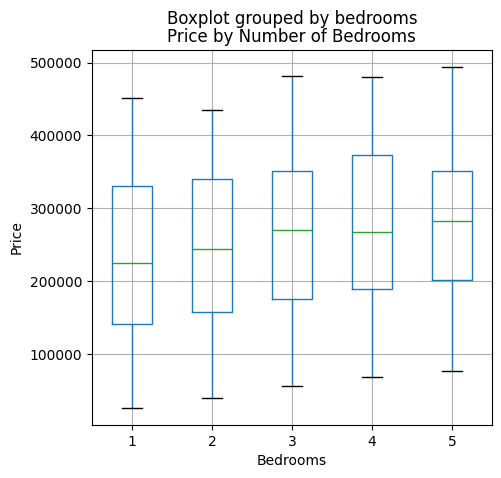

In [11]:
plt.figure(figsize=(5,5))
df.boxplot(column='price', by='bedrooms', ax=plt.gca())
plt.title('Price by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

**4.5 Price vs Age**

Text(0, 0.5, 'Price')

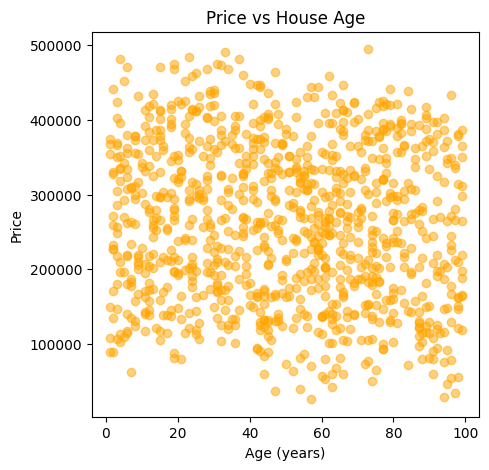

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(df['age'], df['price'], alpha=0.5, color='orange')
plt.title('Price vs House Age')
plt.xlabel('Age (years)')
plt.ylabel('Price')

**4.6 Price vs Condition**

Text(0, 0.5, 'Price')

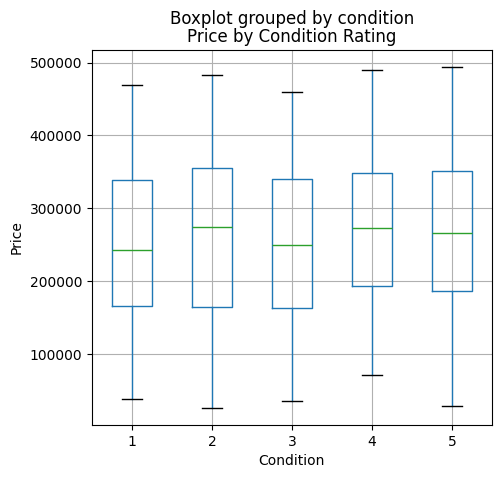

In [13]:
plt.figure(figsize=(5,5))
df.boxplot(column='price', by='condition', ax=plt.gca())
plt.title('Price by Condition Rating')
plt.xlabel('Condition')
plt.ylabel('Price')

**4.7 Testing And Training**

In [14]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **5.Model Training**

**5.1 Linear Regression Model**

In [16]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

**5.2 Random Forest Model**

In [17]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## **6.Prediction and Evaluate Model**

In [18]:
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [19]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Mean Absolute Error: ${np.mean(np.abs(y_true - y_pred)):,.2f}")

    return rmse, r2

In [20]:
lr_rmse, lr_r2 = evaluate_model(y_test, lr_pred, "Linear Regression")
rf_rmse, rf_r2 = evaluate_model(y_test, rf_pred, "Random Forest")


Linear Regression Performance:
  RMSE: $19,255.01
  R² Score: 0.9636
  Mean Absolute Error: $15,151.37

Random Forest Performance:
  RMSE: $23,323.73
  R² Score: 0.9466
  Mean Absolute Error: $18,245.20


## 7.**Model Visualization**

**7.1 Linear Regression**

Text(0.5, 1.0, 'Linear Regression\nR² = 0.964')

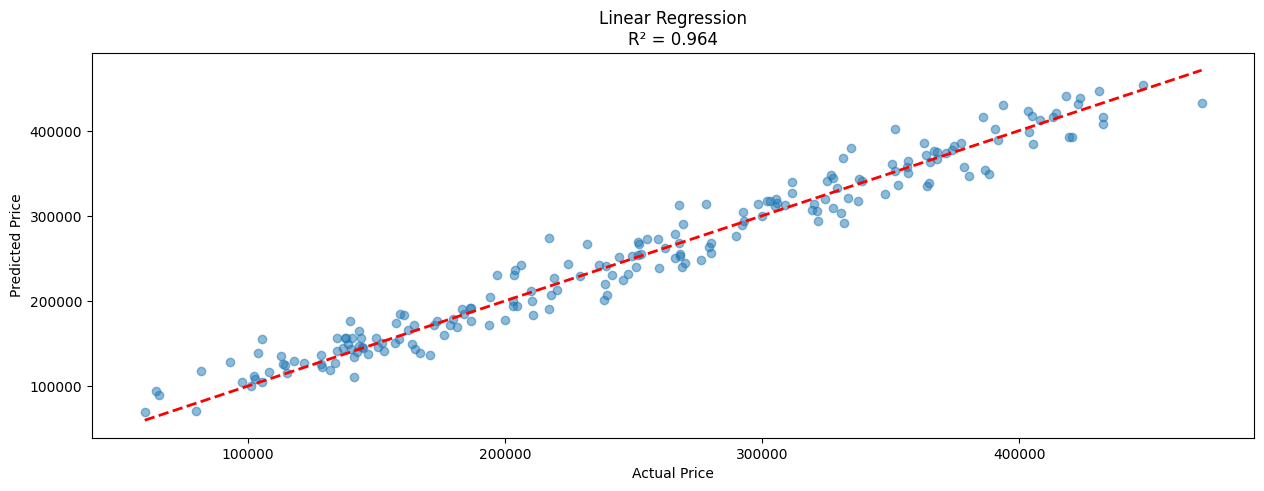

In [38]:
plt.figure(figsize=(15, 5))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression\nR² = {lr_r2:.3f}')

7.2 Random Forest

Text(0.5, 1.0, 'Random Forest\nR² = 0.947')

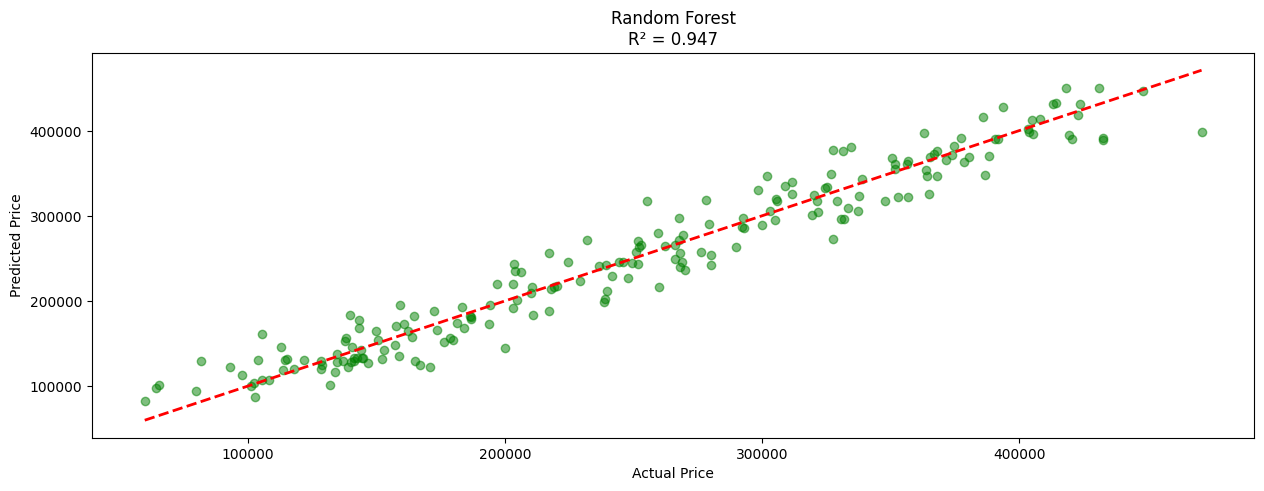

In [36]:
plt.figure(figsize=(15, 5))
plt.scatter(y_test, rf_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Random Forest\nR² = {rf_r2:.3f}')

## **8.Making Prediction For New Data**

In [24]:
new_house = {
    'bedrooms': 3,
    'bathrooms': 2,
    'sqft_living': 2000,
    'sqft_lot': 5000,
    'floors': 2.0,
    'age': 10,
    'condition': 4
}

new_house_df = pd.DataFrame([new_house])
predicted_price_lr = lr_model.predict(new_house_df)[0]
predicted_price_rf = rf_model.predict(new_house_df)[0]

In [25]:
print(f"  Linear Regression: ${predicted_price_lr:,.2f}")
print(f"  Random Forest: ${predicted_price_rf:,.2f}")

  Linear Regression: $263,937.51
  Random Forest: $265,369.15
